In [1]:
import numpy as np

# Step 1: Synthetic Data Preparation
# Example dataset: X (features), y (target)
# Features: [pH, Hardness, Solids]
X = np.array([[7.5, 205, 20000],
              [6.5, 150, 18000],
              [8.0, 300, 22000],
              [7.0, 180, 15000],
              [6.0, 120, 14000]])
y = np.array([1, 0, 1, 0, 0])  # Binary target: 1 = good quality, 0 = bad quality

# Step 2: Loss Function (Log Loss for Classification)
# Initialize predictions to 0.5 for all samples (equal probability)
predictions = np.full(y.shape, 0.5)

# Function to calculate log loss, gradient, and hessian
def log_loss_gradient(y, pred):
    g = pred - y  # First-order gradient
    h = pred * (1 - pred)  # Second-order gradient (Hessian)
    return g, h

# Compute initial gradient and hessian
g, h = log_loss_gradient(y, predictions)
print("Initial Gradients:", g)
print("Initial Hessians:", h)

# Step 3: Decision Tree Split Based on Gain
# Initialize regularization parameters
lambda_reg = 1.0
gamma_reg = 0.1

# Function to calculate gain for a split
def calculate_gain(G_L, H_L, G_R, H_R, lambda_reg, gamma_reg):
    gain = 0.5 * ((G_L**2 / (H_L + lambda_reg)) + (G_R**2 / (H_R + lambda_reg)) - ((G_L + G_R)**2 / (H_L + H_R + lambda_reg))) - gamma_reg
    return gain

# Example split: Let's manually split the data by a simple threshold on feature 0 (pH)
split_value = 7.0
left_indices = X[:, 0] <= split_value
right_indices = X[:, 0] > split_value

# Sum gradients and hessians for the left and right nodes
G_L, H_L = np.sum(g[left_indices]), np.sum(h[left_indices])
G_R, H_R = np.sum(g[right_indices]), np.sum(h[right_indices])

# Calculate gain for the split
gain = calculate_gain(G_L, H_L, G_R, H_R, lambda_reg, gamma_reg)
print("Gain from the split:", gain)

# Step 4: Update Leaf Weights
# Function to calculate weight of a leaf
def calculate_leaf_weight(G, H, lambda_reg):
    return - G / (H + lambda_reg)

# Calculate weights for the left and right leaves
w_L = calculate_leaf_weight(G_L, H_L, lambda_reg)
w_R = calculate_leaf_weight(G_R, H_R, lambda_reg)

print("Left leaf weight:", w_L)
print("Right leaf weight:", w_R)

# Step 5: Update Predictions
# Update predictions based on the new tree
predictions[left_indices] += w_L
predictions[right_indices] += w_R

# Apply sigmoid to convert raw scores to probabilities (for classification)
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

updated_predictions = sigmoid(predictions)
print("Updated Predictions:", updated_predictions)

# Step 6: Repeat Iteratively (not fully implemented here)
# In a full implementation, you'd loop over these steps, adding new trees to the model iteratively.


Initial Gradients: [-0.5  0.5 -0.5  0.5  0.5]
Initial Hessians: [0.25 0.25 0.25 0.25 0.25]
Gain from the split: 0.8206349206349207
Left leaf weight: -0.8571428571428571
Right leaf weight: 0.6666666666666666
Updated Predictions: [0.76254197 0.41165138 0.76254197 0.41165138 0.41165138]


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB

Sample of the data:
         ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  199

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


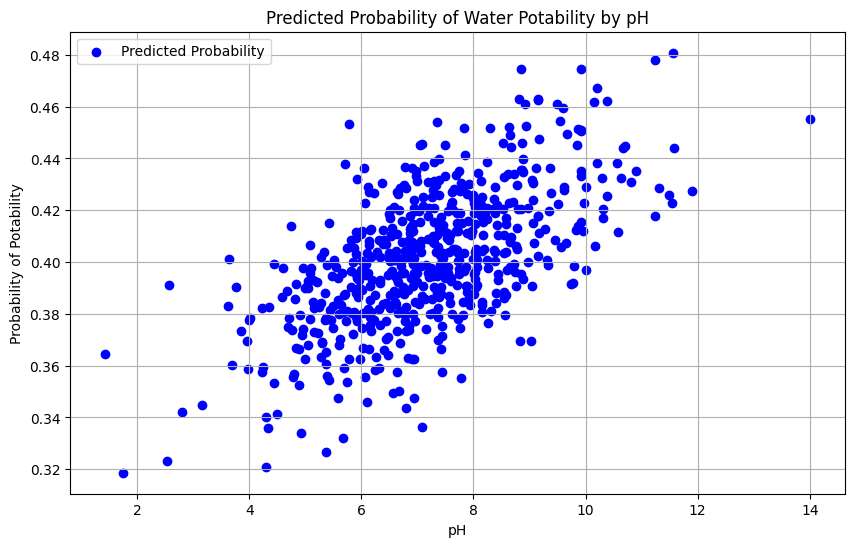

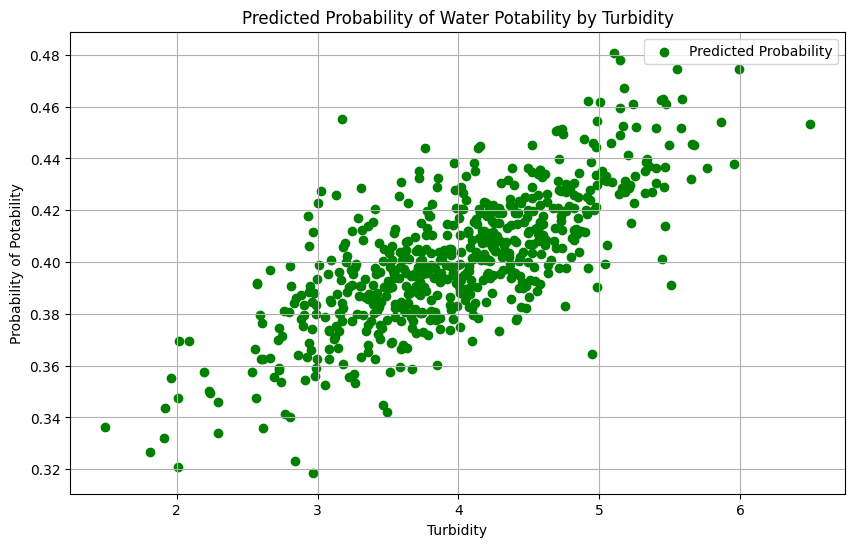

Enter the pH value of the water: 3.71608007538699
Enter the Turbidity value of the water: 4.5006562749424
The water is not drinkable with a probability of 0.62.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [3]:
# Google Colab compatible code

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

# Step 1: Mount Google Drive (if needed for accessing data)
# from google.colab import drive
# drive.mount('/content/drive')

# Step 2: Load data from CSV (upload the file manually or use a path from Drive)
file_path = '/content/water_potability.csv'  # Update this path if using Google Drive
data = pd.read_csv(file_path)

# Display basic information about the data
data.info()
print("\nSample of the data:")
print(data.head())

# Step 3: Data Preprocessing
# Handling missing values by dropping or filling (simplified)
data.dropna(inplace=True)

# Selecting relevant features (e.g., pH and Turbidity) and target
X = data[['ph', 'Turbidity']]
y = data['Potability']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the feature set
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 4: Train a Logistic Regression model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Step 5: Make predictions
y_pred = model.predict(X_test_scaled)
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]

# Step 6: Evaluate the model
print("\nModel Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Step 7: Visualization
# Plotting the predicted probabilities
plt.figure(figsize=(10, 6))
plt.scatter(X_test['ph'], y_pred_proba, color='blue', label='Predicted Probability')
plt.xlabel('pH')
plt.ylabel('Probability of Potability')
plt.title('Predicted Probability of Water Potability by pH')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(X_test['Turbidity'], y_pred_proba, color='green', label='Predicted Probability')
plt.xlabel('Turbidity')
plt.ylabel('Probability of Potability')
plt.title('Predicted Probability of Water Potability by Turbidity')
plt.legend()
plt.grid(True)
plt.show()

# Step 8: User input for prediction
ph_input = float(input("Enter the pH value of the water: "))
turbidity_input = float(input("Enter the Turbidity value of the water: "))

# Preprocess input and make a prediction
input_data = scaler.transform([[ph_input, turbidity_input]])
prediction = model.predict(input_data)
prediction_proba = model.predict_proba(input_data)[0, 1]

# Display result
if prediction[0] == 1:
    print(f"The water is drinkable with a probability of {prediction_proba:.2f}.")
else:
    print(f"The water is not drinkable with a probability of {1 - prediction_proba:.2f}.")